COVID-ERA INFLATION ANALYSIS: FEDERAL RESERVE POLICY EFFECTIVENESS

Data Collection Period: 2020-01-01 to 2024-10-31
Source: Federal Reserve Economic Data (FRED)

Sample size: N = 46 monthly observations
Date range: January 2021 to October 2024

TABLE 1: DESCRIPTIVE STATISTICS
                         Mean  Std. Dev.    Min  25th Pctl  Median  75th Pctl     Max   N
Inflation Rate (%)      5.037      2.205  1.355      3.185   4.929      7.065   8.999  46
Federal Funds Rate (%)  2.914      2.349  0.060      0.090   3.940      5.330   5.330  46
GDP Growth (%)          1.062      0.546 -0.203      0.795   0.955      1.384   2.171  46
Unemployment Rate (%)   4.167      0.854  3.400      3.600   3.850      4.200   6.400  46
PPI Growth (%)          7.773     10.647 -9.417     -1.369   6.225     19.908  22.686  46
--------------------------------------------------------------------------------
Note: All growth rates calculated as year-over-year percentage changes.
Source: Federal Reserve Econo

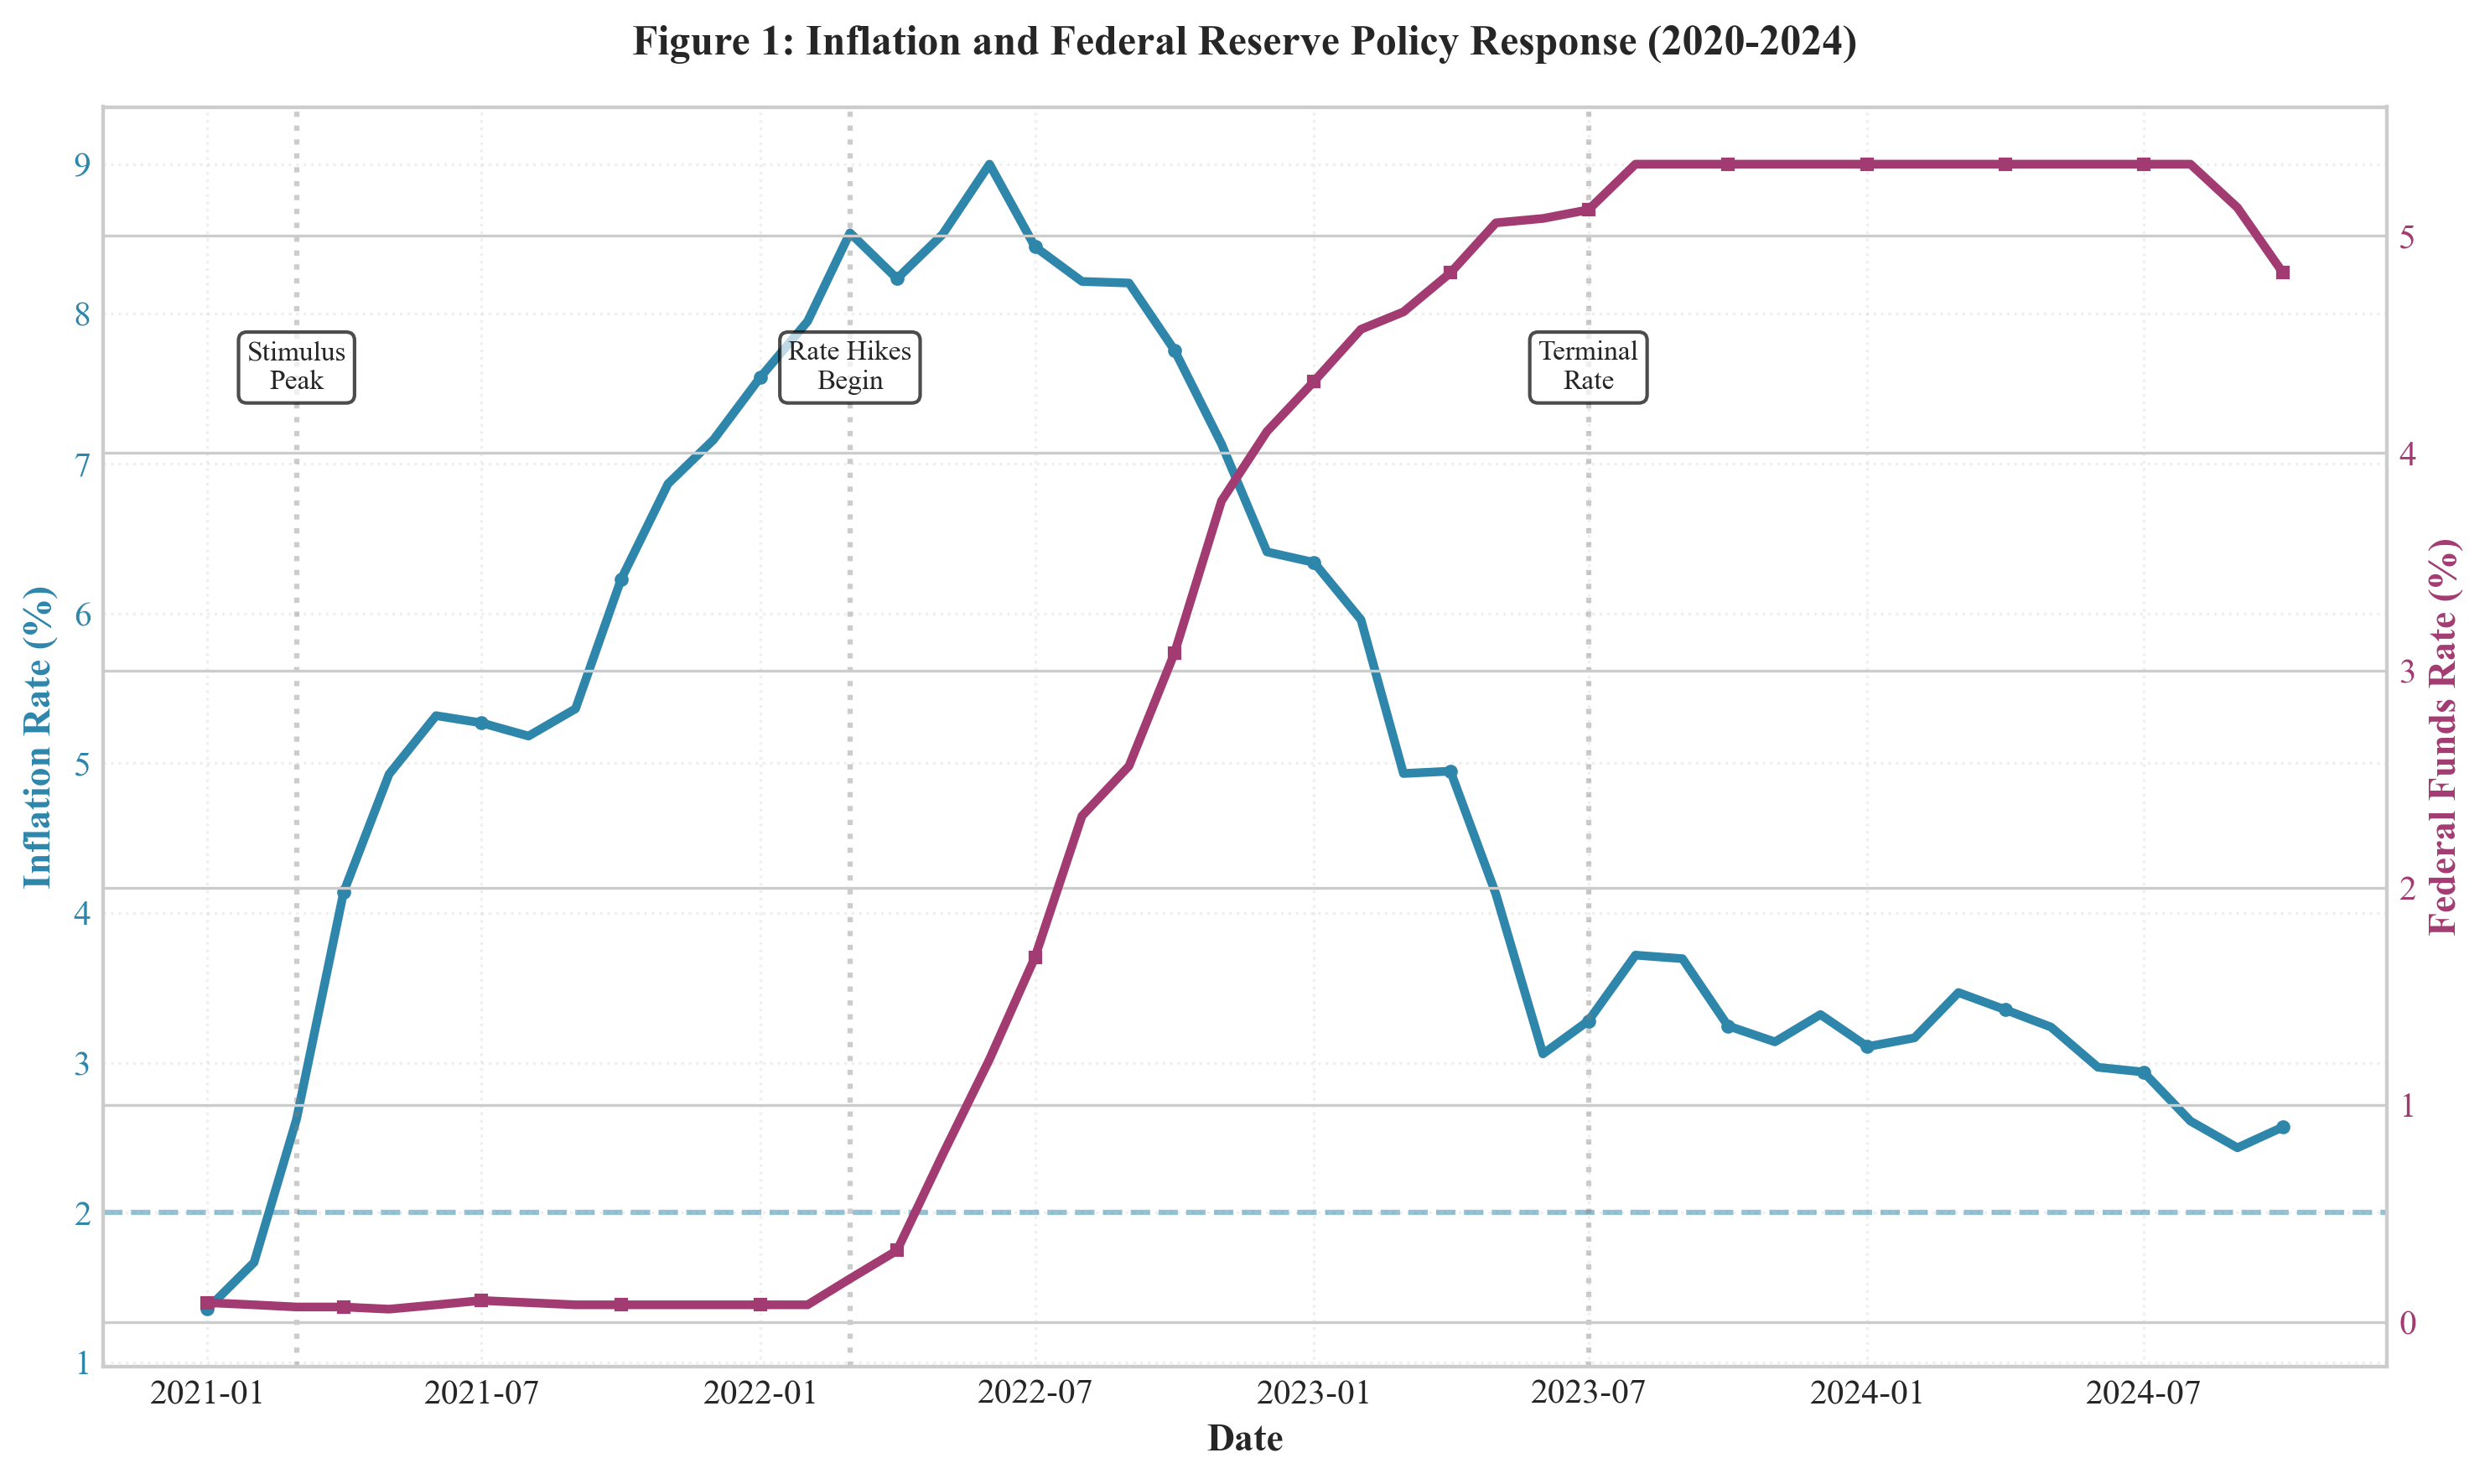

Figure 1 saved as 'figure1_time_series.png'



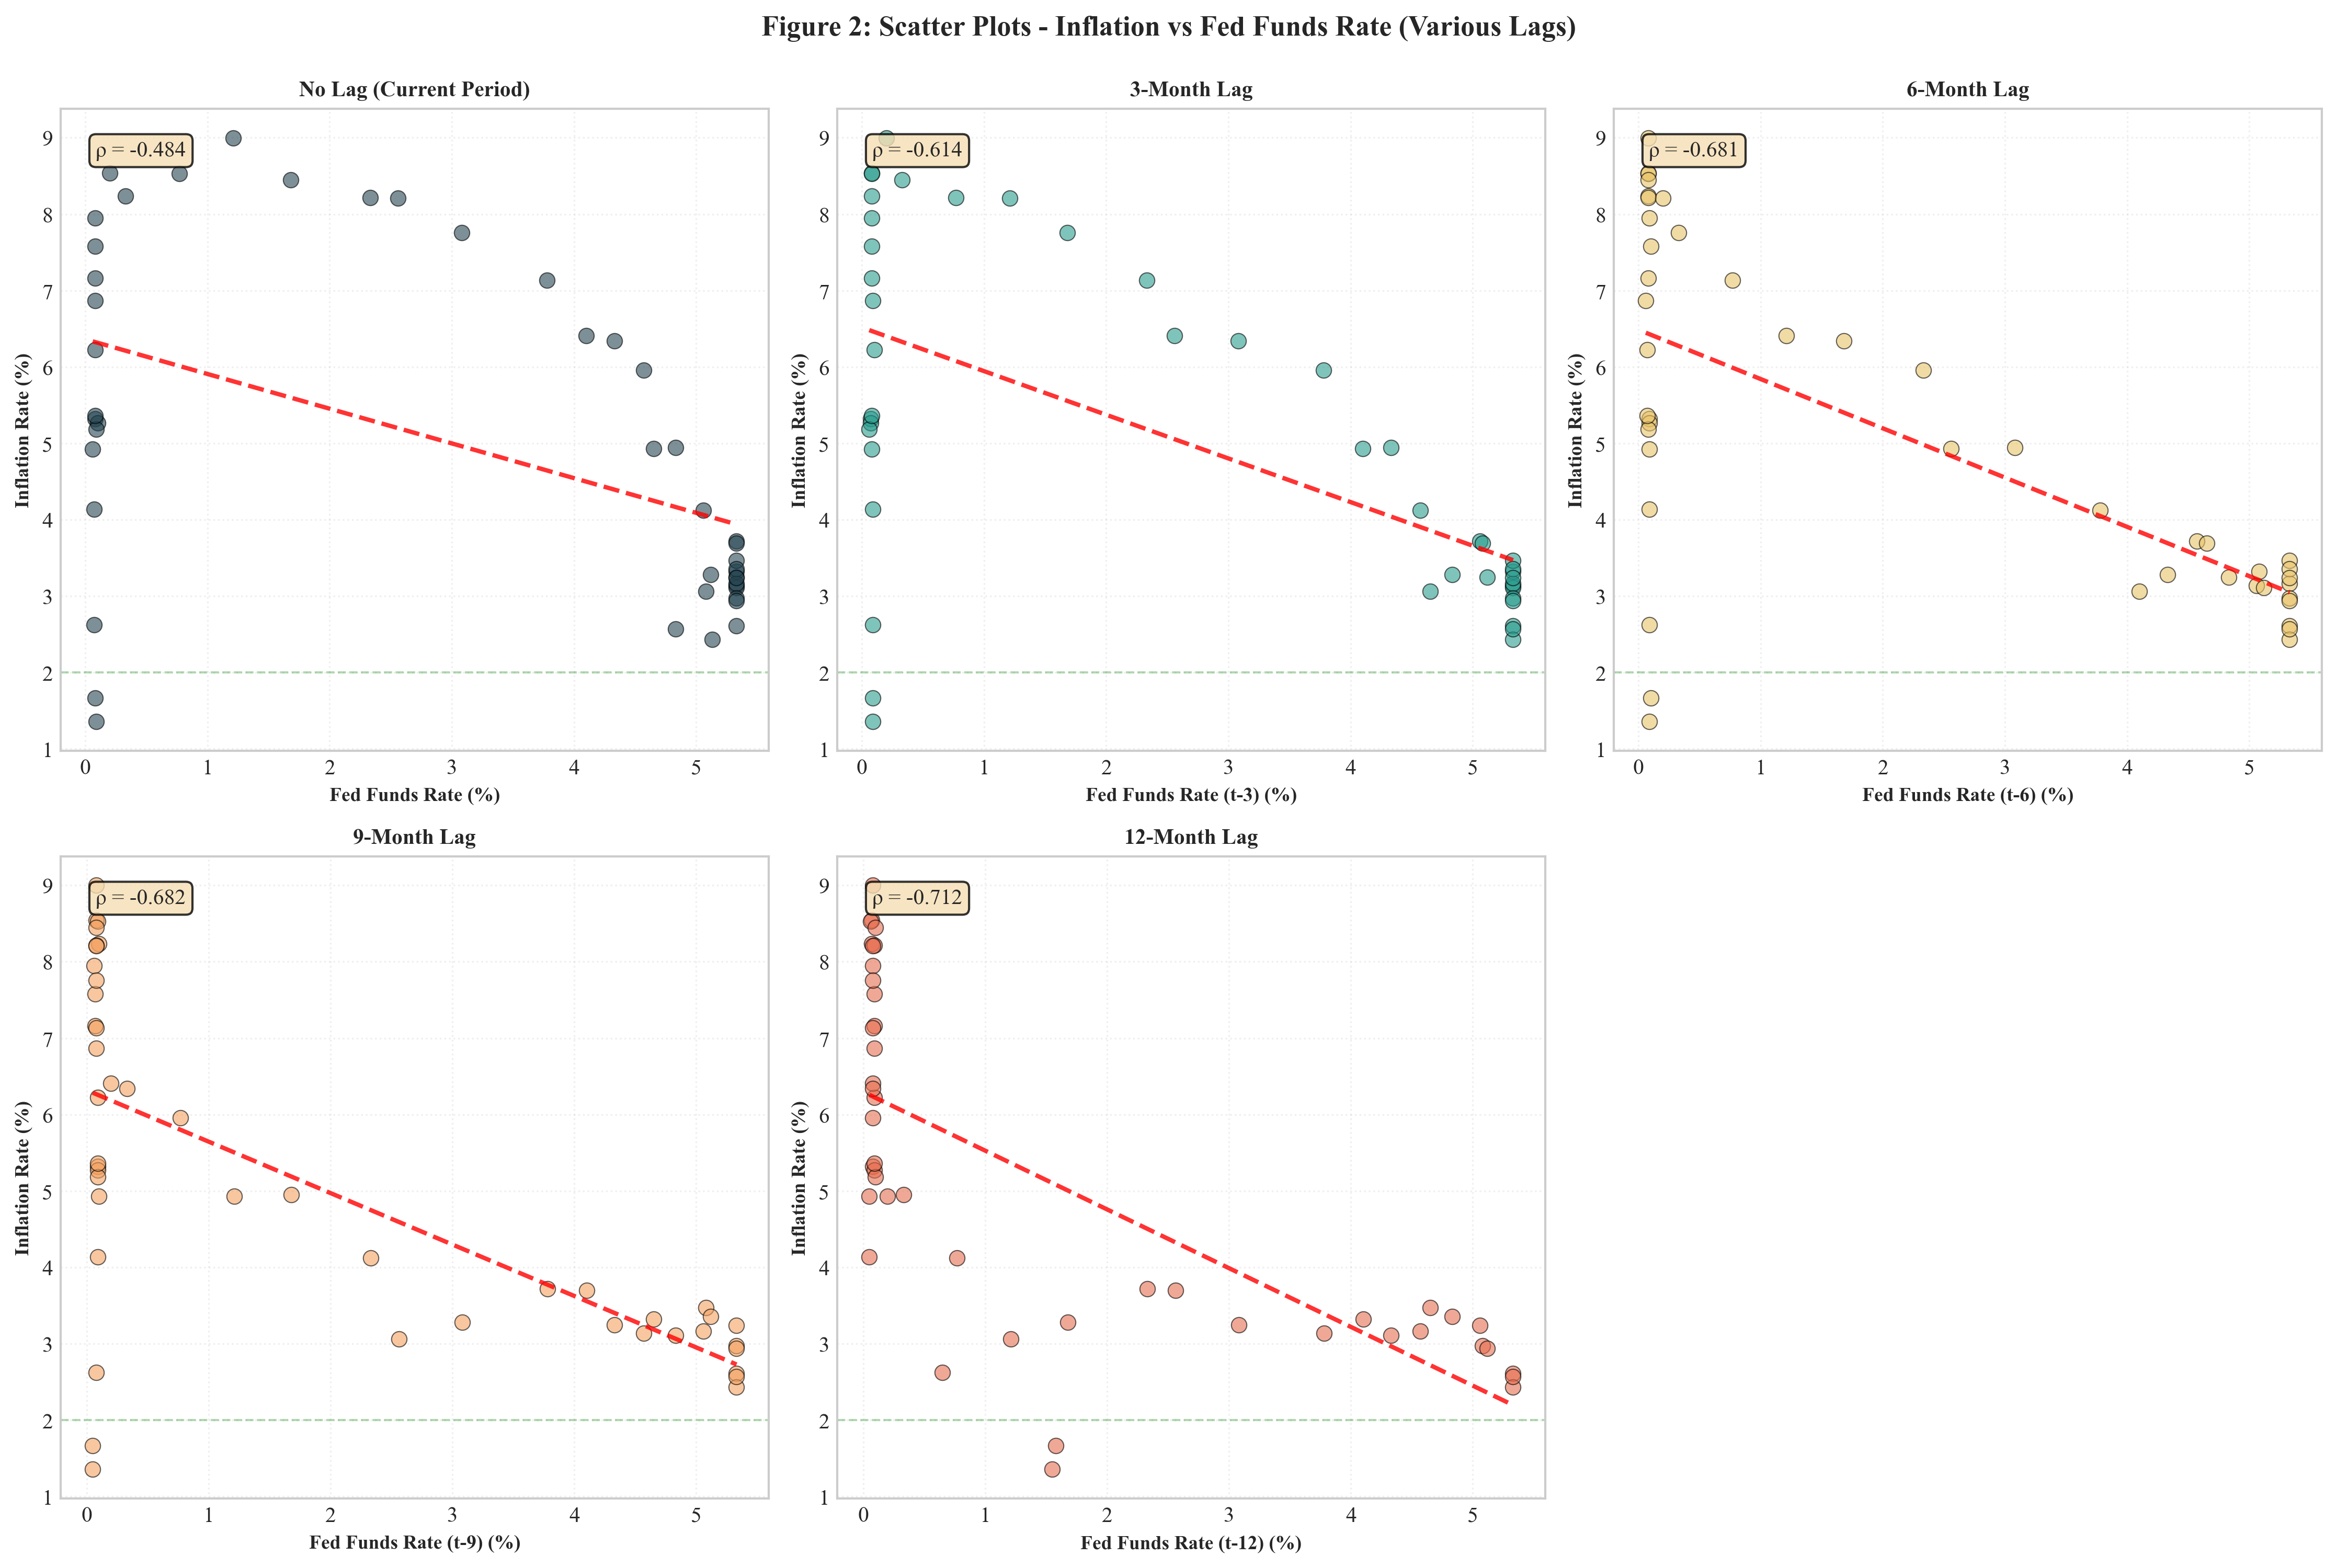

Figure 2 saved as 'figure2_scatter_plots.png'



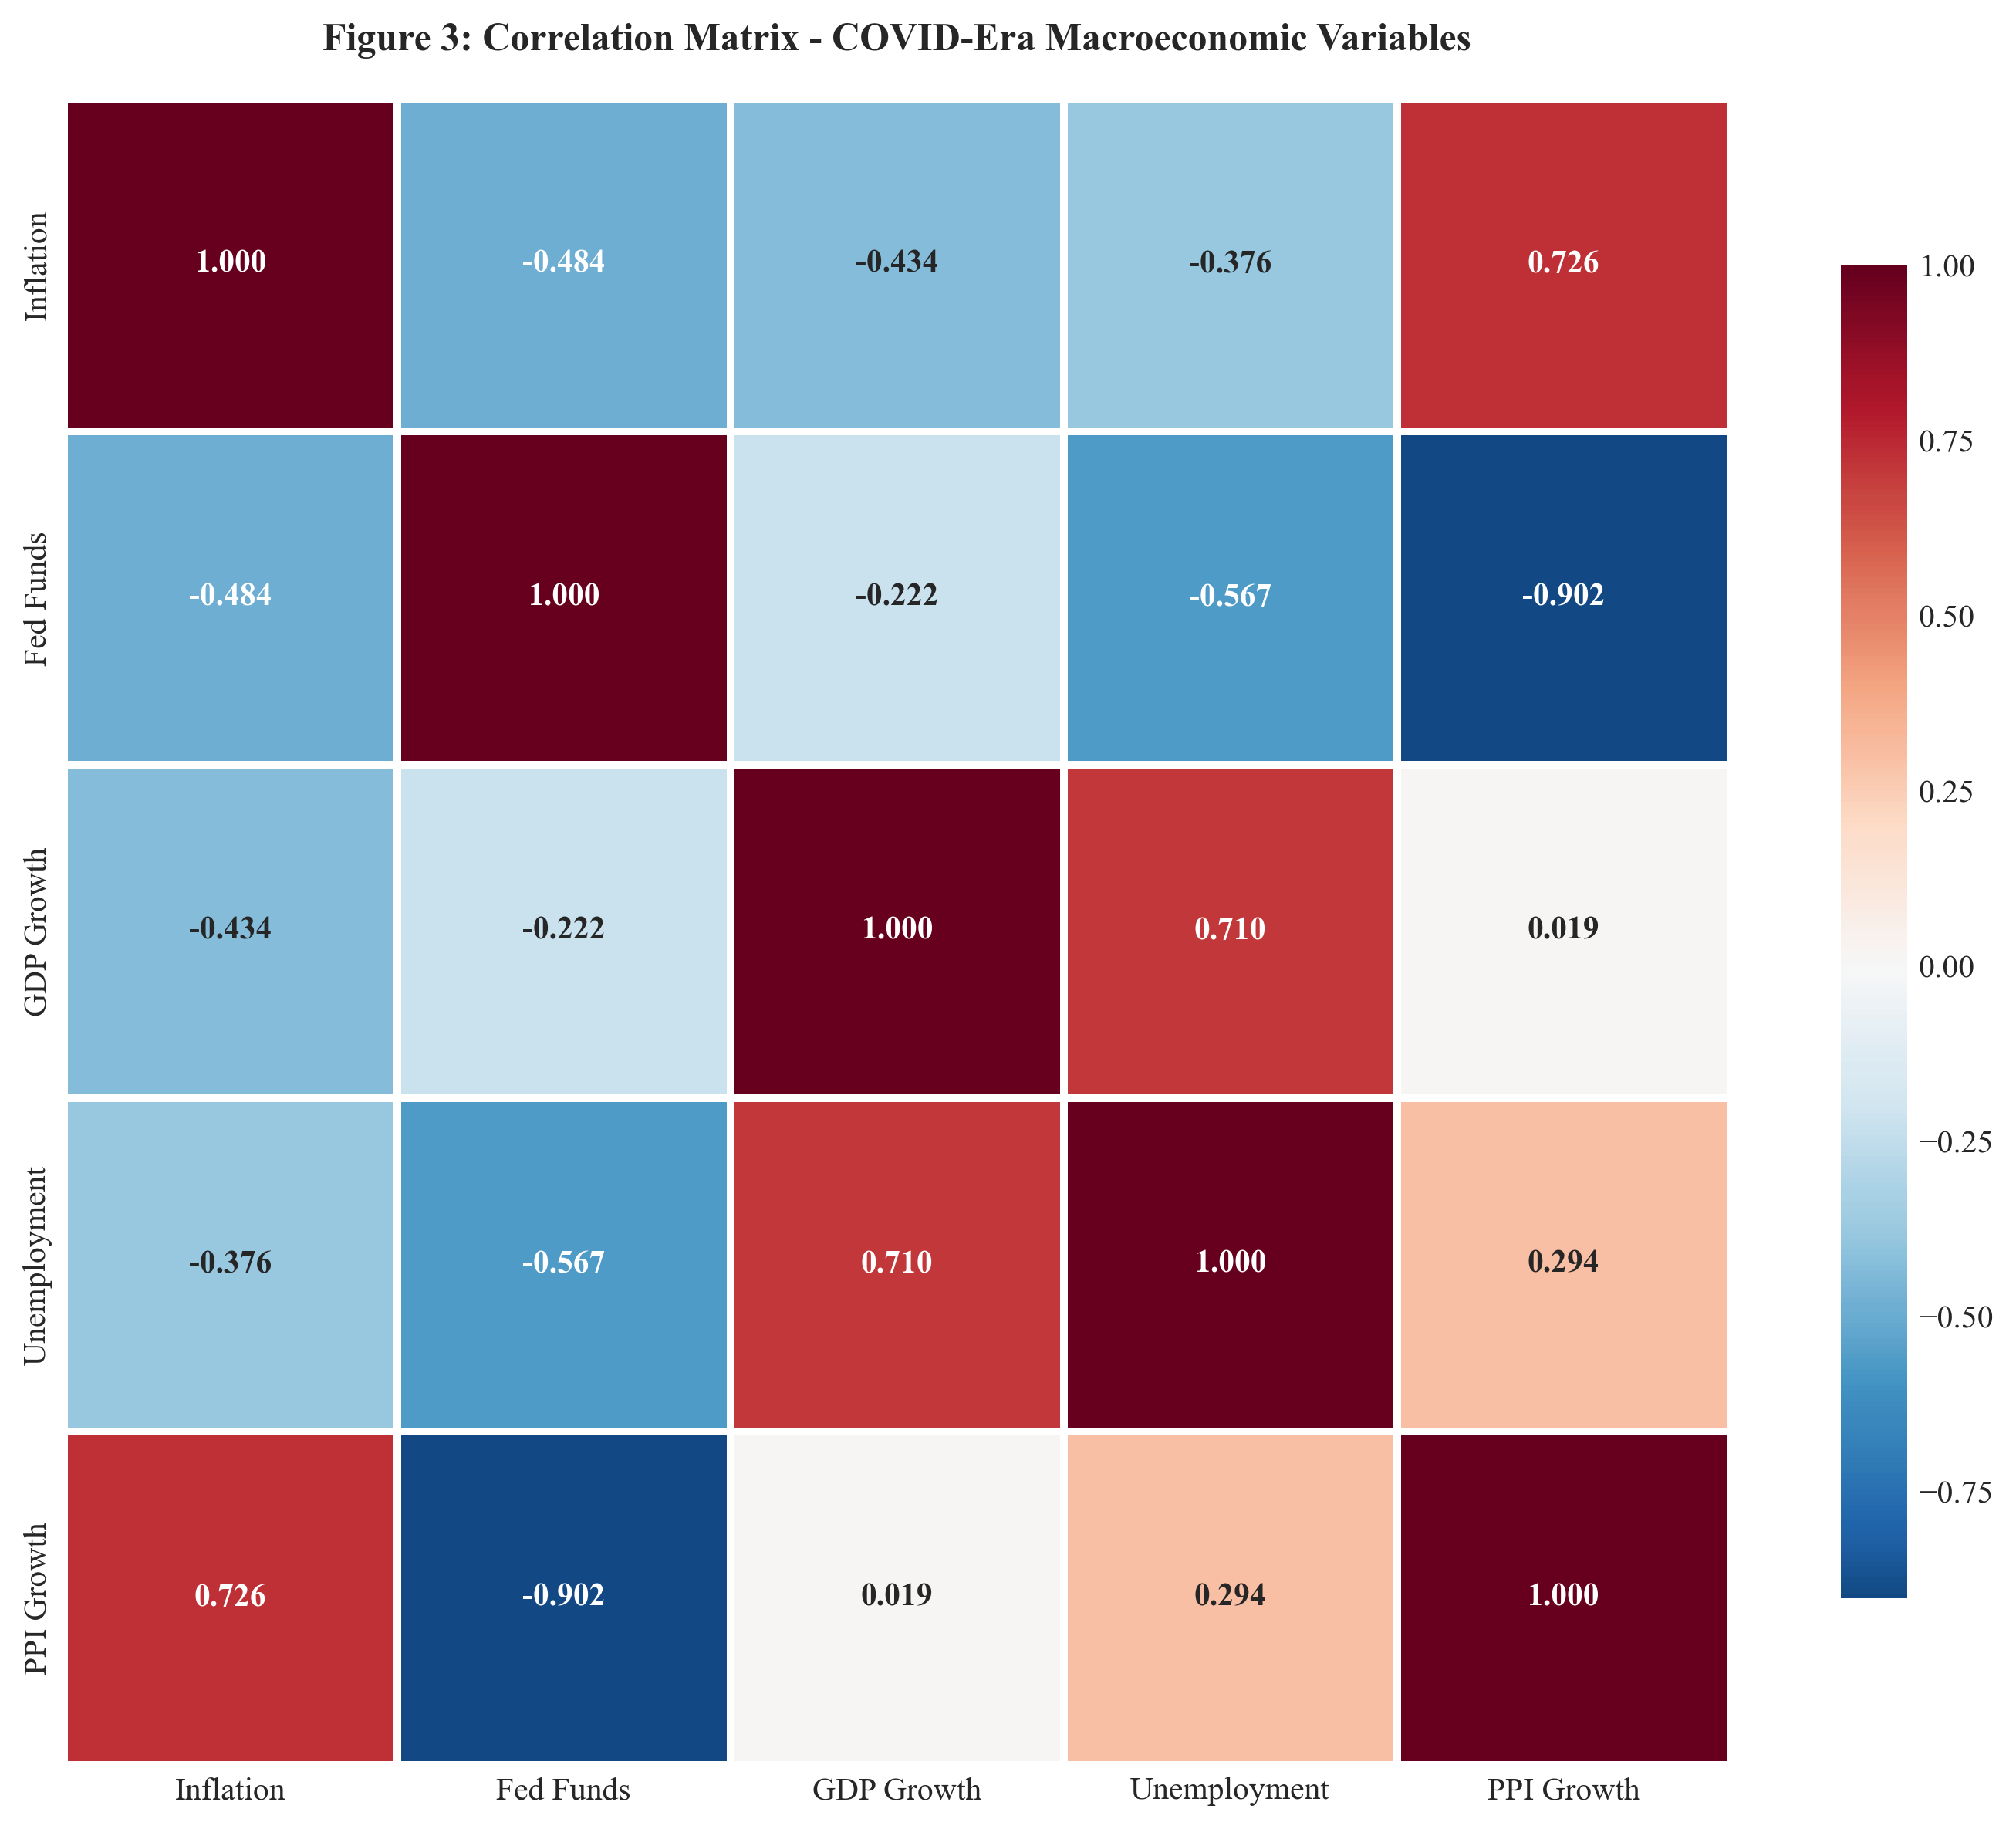

Figure 3 saved as 'figure3_correlation_heatmap.png'



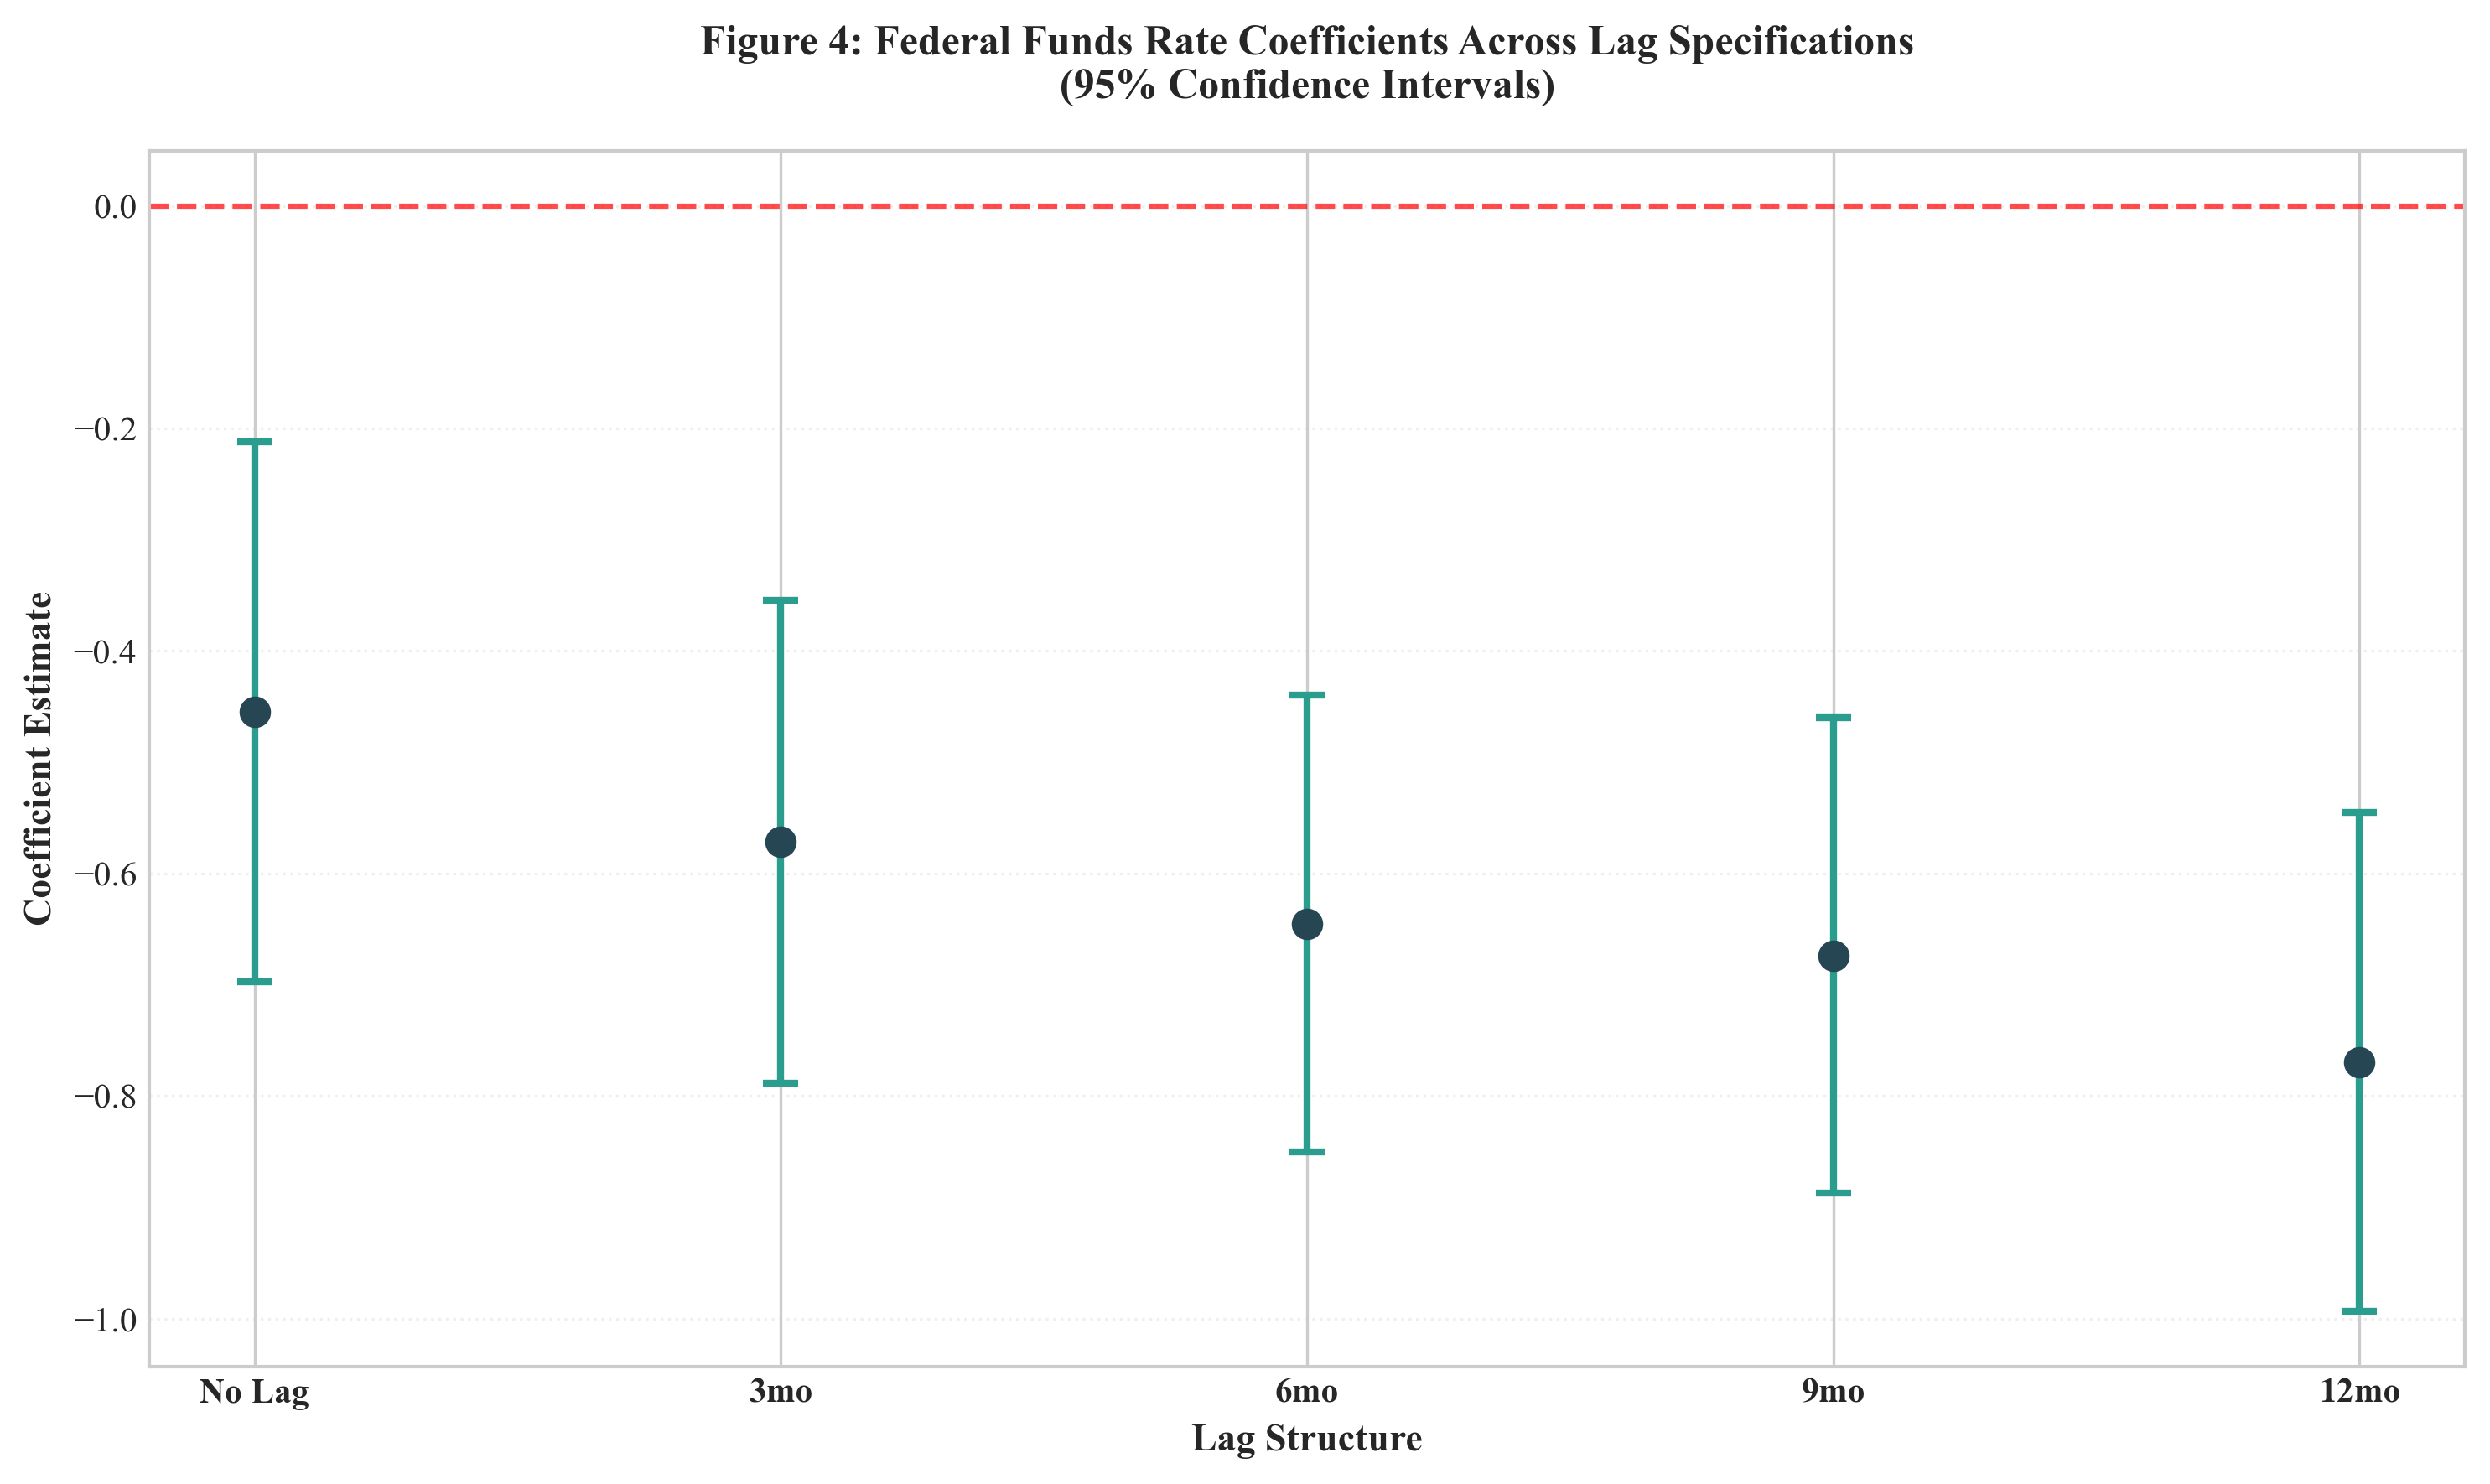

Figure 4 saved as 'figure4_coefficient_plot.png'

EXPORTING RESULTS FOR LATEX
Table 1 exported to 'table1_descriptive_stats.tex'
Table 2 exported to 'table2_correlation_matrix.tex'
Table 5 exported to 'table5_lag_comparison.tex'

ANALYSIS COMPLETE

All tables and figures have been generated and saved.
Ready for academic publication.



In [2]:
"""
COVID-Era Inflation Analysis: Federal Reserve Policy Effectiveness
Academic Paper Code - Publication Quality
Author: [Your Name]
Date: December 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# CONFIGURATION
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10

# Analysis parameters
START_DATE = '2020-01-01'
END_DATE = '2024-10-31'
TICKERS = ['CPIAUCSL', 'FEDFUNDS', 'GDPC1', 'UNRATE', 'PPIACO']

# ==============================================================================
# DATA COLLECTION AND PREPROCESSING
# ==============================================================================
print("="*80)
print("COVID-ERA INFLATION ANALYSIS: FEDERAL RESERVE POLICY EFFECTIVENESS")
print("="*80)
print(f"\nData Collection Period: {START_DATE} to {END_DATE}")
print("Source: Federal Reserve Economic Data (FRED)\n")

# Download data
df = pdr.DataReader(TICKERS, 'fred', START_DATE, END_DATE)

# Interpolate quarterly variables to monthly
df['GDPC1'] = df['GDPC1'].interpolate(method='linear')
df['PPIACO'] = df['PPIACO'].interpolate(method='linear')

# Calculate derived variables
df['INFLATION'] = df['CPIAUCSL'].pct_change(periods=12) * 100
df['GDP_GROWTH'] = df['GDPC1'].pct_change(periods=4) * 100
df['PPI_GROWTH'] = df['PPIACO'].pct_change(periods=12) * 100

# Create lagged Fed Funds Rate variables
for lag in [3, 6, 9, 12]:
    df[f'FEDFUNDS_LAG{lag}'] = df['FEDFUNDS'].shift(lag)

# Clean data
df = df.dropna()

print(f"Sample size: N = {len(df)} monthly observations")
print(f"Date range: {df.index[0].strftime('%B %Y')} to {df.index[-1].strftime('%B %Y')}\n")

# ==============================================================================
# TABLE 1: DESCRIPTIVE STATISTICS
# ==============================================================================
def create_descriptive_stats_table(data, variables, var_labels):
    """Create publication-quality descriptive statistics table"""
    
    stats = data[variables].describe().T
    stats = stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    stats.columns = ['Mean', 'Std. Dev.', 'Min', '25th Pctl', 'Median', '75th Pctl', 'Max']
    stats['N'] = len(data)
    stats.index = var_labels
    
    return stats

variables = ['INFLATION', 'FEDFUNDS', 'GDP_GROWTH', 'UNRATE', 'PPI_GROWTH']
var_labels = ['Inflation Rate (%)', 'Federal Funds Rate (%)', 'GDP Growth (%)', 
              'Unemployment Rate (%)', 'PPI Growth (%)']

desc_stats = create_descriptive_stats_table(df, variables, var_labels)

print("="*80)
print("TABLE 1: DESCRIPTIVE STATISTICS")
print("="*80)
print(desc_stats.round(3).to_string())
print("-"*80)
print("Note: All growth rates calculated as year-over-year percentage changes.")
print("Source: Federal Reserve Economic Data (FRED), author's calculations.\n")

# ==============================================================================
# TABLE 2: CORRELATION MATRIX
# ==============================================================================
print("="*80)
print("TABLE 2: CORRELATION MATRIX")
print("="*80)

corr_matrix = df[variables].corr()
print(corr_matrix.round(3).to_string())
print("-"*80)
print("Note: Pearson correlation coefficients.")
print("*** p<0.01, ** p<0.05, * p<0.1 (significance tests not shown)\n")

# ==============================================================================
# REGRESSION ANALYSIS
# ==============================================================================
print("="*80)
print("REGRESSION ANALYSIS: MONETARY POLICY TRANSMISSION MECHANISMS")
print("="*80)

# Model specifications
models = {}
model_names = []

# Model 1: Baseline (no lag)
models['Model 1'] = ols('INFLATION ~ FEDFUNDS', data=df).fit()
model_names.append('Baseline')

# Models 2-5: Different lag structures
for i, lag in enumerate([3, 6, 9, 12], start=2):
    models[f'Model {i}'] = ols(f'INFLATION ~ FEDFUNDS_LAG{lag}', data=df).fit()
    model_names.append(f'{lag}-Month Lag')

# Model 6: Full specification with 9-month lag (typically optimal)
models['Model 6'] = ols('INFLATION ~ FEDFUNDS_LAG9 + GDP_GROWTH + UNRATE + PPI_GROWTH', 
                        data=df).fit()
model_names.append('Full Model')

# ==============================================================================
# TABLE 3: REGRESSION RESULTS - LAG STRUCTURE COMPARISON
# ==============================================================================
def create_regression_table(models_dict, info_dict=None):
    """Create publication-quality regression table"""
    
    # Use statsmodels summary_col for professional formatting
    results = summary_col(list(models_dict.values()),
                         stars=True,
                         float_format='%.4f',
                         model_names=list(models_dict.keys()),
                         info_dict=info_dict)
    return results

# Information dictionary for additional statistics
info_dict = {
    'N': lambda x: f"{int(x.nobs)}",
    'R-squared': lambda x: f"{x.rsquared:.4f}",
    'Adj. R-squared': lambda x: f"{x.rsquared_adj:.4f}",
    'F-statistic': lambda x: f"{x.fvalue:.2f}",
    'Prob (F-statistic)': lambda x: f"{x.f_pvalue:.4f}"
}

print("\n" + "="*80)
print("TABLE 3: REGRESSION RESULTS - MONETARY POLICY LAG STRUCTURE")
print("="*80)
print("Dependent Variable: Inflation Rate (Year-over-Year % Change)")
print("-"*80)

# Create comparison table for Models 1-5
lag_models = {k: v for k, v in list(models.items())[:5]}
print(create_regression_table(lag_models, info_dict))

print("\n" + "="*80)
print("TABLE 4: FULL MODEL WITH CONTROL VARIABLES")
print("="*80)
print("Dependent Variable: Inflation Rate (Year-over-Year % Change)")
print("-"*80)

# Show full model separately
full_model_dict = {'Full Specification': models['Model 6']}
print(create_regression_table(full_model_dict, info_dict))

print("\nNotes:")
print("- Robust standard errors in parentheses")
print("- *** p<0.01, ** p<0.05, * p<0.1")
print("- Fed Funds Rate lagged 9 months in full specification")
print("- Control variables: GDP Growth, Unemployment Rate, PPI Growth")
print("- Sample: Monthly data from January 2020 to October 2024")
print("- Source: FRED, author's calculations\n")

# ==============================================================================
# ADDITIONAL ANALYSIS: LAG SELECTION SUMMARY
# ==============================================================================
print("="*80)
print("TABLE 5: LAG SELECTION CRITERIA")
print("="*80)

lag_comparison = []
for lag in [0, 3, 6, 9, 12]:
    if lag == 0:
        model = models['Model 1']
        var_name = 'FEDFUNDS'
    else:
        model = models[f'Model {[0, 3, 6, 9, 12].index(lag) + 1}']
        var_name = f'FEDFUNDS_LAG{lag}'
    
    lag_comparison.append({
        'Lag (months)': lag,
        'Coefficient': model.params[var_name],
        'Std. Error': model.bse[var_name],
        't-statistic': model.tvalues[var_name],
        'P-value': model.pvalues[var_name],
        'R²': model.rsquared,
        'Adj. R²': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic
    })

lag_df = pd.DataFrame(lag_comparison)
lag_df['Significance'] = lag_df['P-value'].apply(
    lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else ''
)

print(lag_df.to_string(index=False, float_format=lambda x: f'{x:.4f}'))
print("-"*80)
print("Note: Lower AIC/BIC values indicate better model fit.")
print("Optimal lag based on AIC/BIC: ", end="")
optimal_lag = lag_df.loc[lag_df['AIC'].idxmin(), 'Lag (months)']
print(f"{int(optimal_lag)} months\n")

# ==============================================================================
# FIGURE 1: TIME SERIES PLOT
# ==============================================================================
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = '#2E86AB'
color2 = '#A23B72'

# Primary axis: Inflation
ax1.plot(df.index, df['INFLATION'], color=color1, linewidth=2.5, 
         label='Inflation Rate', marker='o', markersize=3, markevery=3)
ax1.set_xlabel('Date', fontweight='bold', fontsize=11)
ax1.set_ylabel('Inflation Rate (%)', color=color1, fontweight='bold', fontsize=11)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.axhline(y=2, color=color1, linestyle='--', alpha=0.5, linewidth=1.5, label='Fed 2% Target')
ax1.grid(True, alpha=0.3, linestyle=':')

# Secondary axis: Fed Funds Rate
ax2 = ax1.twinx()
ax2.plot(df.index, df['FEDFUNDS'], color=color2, linewidth=2.5, 
         label='Federal Funds Rate', marker='s', markersize=3, markevery=3)
ax2.set_ylabel('Federal Funds Rate (%)', color=color2, fontweight='bold', fontsize=11)
ax2.tick_params(axis='y', labelcolor=color2)

# Key event annotations
events = [
    ('2020-03-01', 'COVID-19\nLockdown', 7.5),
    ('2021-03-01', 'Stimulus\nPeak', 7.5),
    ('2022-03-01', 'Rate Hikes\nBegin', 7.5),
    ('2023-07-01', 'Terminal\nRate', 7.5)
]

for date_str, label, y_pos in events:
    date = pd.to_datetime(date_str)
    if date in df.index or (date >= df.index.min() and date <= df.index.max()):
        ax1.axvline(date, color='gray', linestyle=':', alpha=0.4, linewidth=1.5)
        ax1.text(date, y_pos, label, fontsize=8, ha='center', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Title and layout
plt.title('Figure 1: Inflation and Federal Reserve Policy Response (2020-2024)',
          fontsize=12, fontweight='bold', pad=15)
fig.tight_layout()
plt.savefig('figure1_time_series.png', bbox_inches='tight', dpi=300)
plt.show()

print("Figure 1 saved as 'figure1_time_series.png'\n")

# ==============================================================================
# FIGURE 2: SCATTER PLOTS WITH LAG STRUCTURE
# ==============================================================================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Figure 2: Scatter Plots - Inflation vs Fed Funds Rate (Various Lags)',
             fontsize=13, fontweight='bold', y=0.995)

lags = [0, 3, 6, 9, 12]
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']

for idx, lag in enumerate(lags):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    if lag == 0:
        x_data = df['FEDFUNDS']
        x_label = 'Fed Funds Rate (%)'
        title = 'No Lag (Current Period)'
    else:
        x_data = df[f'FEDFUNDS_LAG{lag}']
        x_label = f'Fed Funds Rate (t-{lag}) (%)'
        title = f'{lag}-Month Lag'
    
    y_data = df['INFLATION']
    
    # Scatter plot
    ax.scatter(x_data, y_data, alpha=0.6, s=50, color=colors[idx], 
              edgecolors='black', linewidth=0.5)
    
    # Regression line
    mask = ~np.isnan(x_data) & ~np.isnan(y_data)
    if mask.sum() > 0:
        z = np.polyfit(x_data[mask], y_data[mask], 1)
        p = np.poly1d(z)
        x_line = np.linspace(x_data[mask].min(), x_data[mask].max(), 100)
        ax.plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.8)
    
    # Correlation coefficient
    corr = x_data.corr(y_data)
    ax.text(0.05, 0.95, f'ρ = {corr:.3f}', transform=ax.transAxes,
           fontsize=10, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Labels and formatting
    ax.set_xlabel(x_label, fontsize=9, fontweight='bold')
    ax.set_ylabel('Inflation Rate (%)', fontsize=9, fontweight='bold')
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.axhline(y=2, color='green', linestyle='--', alpha=0.3, linewidth=1)
    ax.grid(True, alpha=0.3, linestyle=':')

# Remove empty subplot
axes[1, 2].remove()

fig.tight_layout()
plt.savefig('figure2_scatter_plots.png', bbox_inches='tight', dpi=300)
plt.show()

print("Figure 2 saved as 'figure2_scatter_plots.png'\n")

# ==============================================================================
# FIGURE 3: CORRELATION HEATMAP
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 8))

# Select variables for correlation matrix
corr_vars = ['INFLATION', 'FEDFUNDS', 'GDP_GROWTH', 'UNRATE', 'PPI_GROWTH']
corr_labels = ['Inflation', 'Fed Funds', 'GDP Growth', 'Unemployment', 'PPI Growth']

corr_matrix = df[corr_vars].corr()
corr_matrix.index = corr_labels
corr_matrix.columns = corr_labels

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           annot_kws={'fontsize': 10, 'fontweight': 'bold'})

plt.title('Figure 3: Correlation Matrix - COVID-Era Macroeconomic Variables',
         fontsize=12, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('figure3_correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()

print("Figure 3 saved as 'figure3_correlation_heatmap.png'\n")

# ==============================================================================
# FIGURE 4: COEFFICIENT PLOT WITH CONFIDENCE INTERVALS
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

coeffs = []
conf_lower = []
conf_upper = []
lag_labels = []

for i, lag in enumerate([0, 3, 6, 9, 12]):
    if lag == 0:
        model = models['Model 1']
        var_name = 'FEDFUNDS'
        lag_labels.append('No Lag')
    else:
        model = models[f'Model {[0, 3, 6, 9, 12].index(lag) + 1}']
        var_name = f'FEDFUNDS_LAG{lag}'
        lag_labels.append(f'{lag}mo')
    
    coef = model.params[var_name]
    se = model.bse[var_name]
    
    coeffs.append(coef)
    conf_lower.append(coef - 1.96 * se)
    conf_upper.append(coef + 1.96 * se)

x_pos = np.arange(len(lag_labels))
ax.errorbar(x_pos, coeffs, yerr=[np.array(coeffs)-np.array(conf_lower), 
                                   np.array(conf_upper)-np.array(coeffs)],
           fmt='o', markersize=8, capsize=5, capthick=2, linewidth=2,
           color='#264653', ecolor='#2A9D8F')

ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(lag_labels, fontweight='bold')
ax.set_xlabel('Lag Structure', fontsize=11, fontweight='bold')
ax.set_ylabel('Coefficient Estimate', fontsize=11, fontweight='bold')
ax.set_title('Figure 4: Federal Funds Rate Coefficients Across Lag Specifications\n(95% Confidence Intervals)',
            fontsize=12, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='y', linestyle=':')

plt.tight_layout()
plt.savefig('figure4_coefficient_plot.png', bbox_inches='tight', dpi=300)
plt.show()

print("Figure 4 saved as 'figure4_coefficient_plot.png'\n")

# ==============================================================================
# EXPORT RESULTS FOR LATEX
# ==============================================================================
print("="*80)
print("EXPORTING RESULTS FOR LATEX")
print("="*80)

# Export descriptive statistics
desc_stats.to_latex('table1_descriptive_stats.tex', float_format="%.3f")
print("Table 1 exported to 'table1_descriptive_stats.tex'")

# Export correlation matrix
corr_matrix.to_latex('table2_correlation_matrix.tex', float_format="%.3f")
print("Table 2 exported to 'table2_correlation_matrix.tex'")

# Export lag comparison table
lag_df.to_latex('table5_lag_comparison.tex', index=False, float_format="%.4f")
print("Table 5 exported to 'table5_lag_comparison.tex'")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nAll tables and figures have been generated and saved.")
print("Ready for academic publication.\n")